# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lativa Wartanirahma
- **Email:** m004d4kx1477@bangkit.academy
- **ID Dicoding:** lativwnr

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [200]:
df_day=pd.read_csv("/content/day.csv", delimiter=",")
print(df_day)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

### Assessing Data

In [106]:
df_day.isnull().sum()
df_day.info()
print(df_day.describe())
print("duplicated data: ", df_day.duplicated().sum())

#finding outliers
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

outliers = find_outliers_IQR(df_day["registered"])
print("number of outliers: "+str(len(outliers)))
outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
          instant      season          yr        mnth     holiday     weekday  \
count  731.0

Series([], Name: registered, dtype: int64)

### Cleaning Data

In [115]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           )
       )
   return df

df_day['windspeed']=impute_outliers_IQR(df_day['windspeed'])
df_day['casual']=impute_outliers_IQR(df_day['casual'])
df_day['hum']=impute_outliers_IQR(df_day['hum'])


## Exploratory Data Analysis (EDA)

### Explore ...

                temp     atemp  windspeed    casual  registered       cnt
temp        1.000000  0.991702  -0.140561  0.592927    0.540012  0.627494
atemp       0.991702  1.000000  -0.165925  0.592171    0.544192  0.631066
windspeed  -0.140561 -0.165925   1.000000 -0.181873   -0.204665 -0.217140
casual      0.592927  0.592171  -0.181873  1.000000    0.431009  0.620630
registered  0.540012  0.544192  -0.204665  0.431009    1.000000  0.945517
cnt         0.627494  0.631066  -0.217140  0.620630    0.945517  1.000000 

[[ 1.          0.02816064  0.45407661 ...  0.37905256 -0.11394194
  -0.05014607]
 [ 0.02816064  1.          0.49613894 ...  0.21256824  0.31124173
   0.33884051]
 [ 0.45407661  0.49613894  1.         ...  0.40909585  0.25650735
   0.33711815]
 ...
 [ 0.37905256  0.21256824  0.40909585 ...  1.          0.87056264
   0.89457494]
 [-0.11394194  0.31124173  0.25650735 ...  0.87056264  1.
   0.99308149]
 [-0.05014607  0.33884051  0.33711815 ...  0.89457494  0.99308149
   1.       

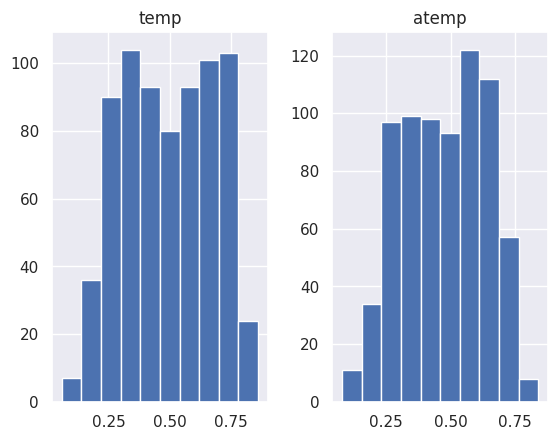

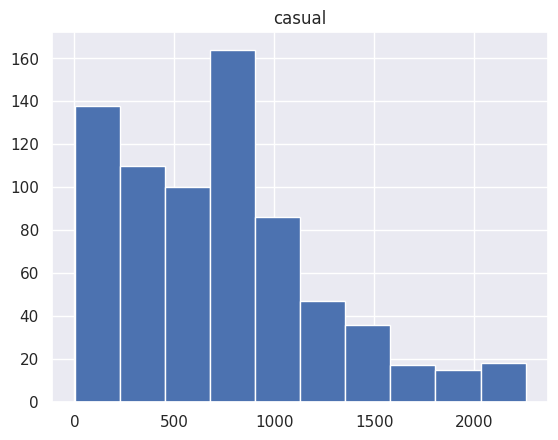

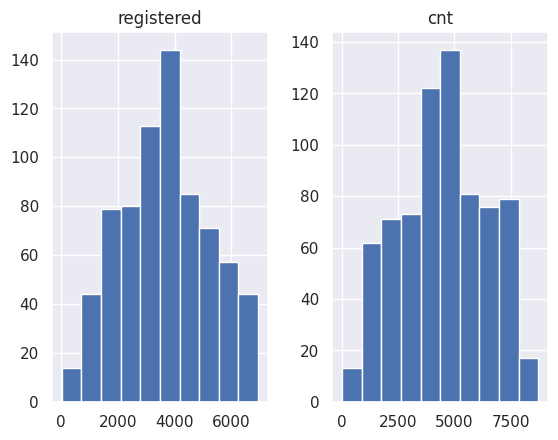

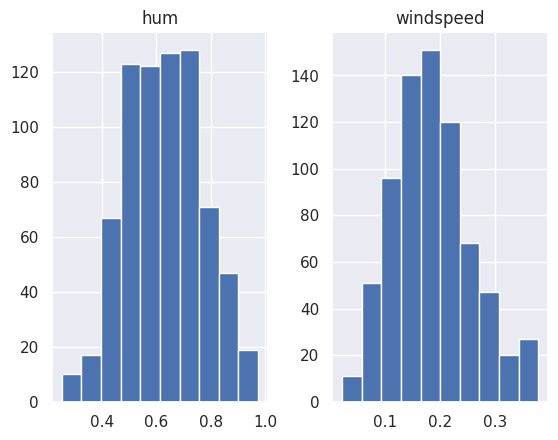

In [81]:
#statistik deskriptif
df_day.describe()

#distribusi (sebaran data)
df_day.hist(['temp','atemp'])
df_day.hist(['casual'])
df_day.hist(['registered','cnt'])
df_day.hist(['hum', 'windspeed'])

#hubungan antar data
day_cont = df_day[['temp', 'atemp', 'windspeed','casual', 'registered', 'cnt']].copy(deep=True)
day_cat = df_day[['holiday', 'weekday', 'workingday','weathersit', 'yr', 'season', 'mnth']].copy(deep=True)

#correlation between contunu variable
print(day_cont.corr(), '\n')

#correlation between categorical variable
print(np.corrcoef(day_cat))





In [181]:
#pivot table
weekday = df_day.groupby(by='weekday').agg({
    'registered': 'sum',
    'cnt': 'sum',
    'casual': 'sum',
}).round(0)

weathersit = df_day.groupby(by='weathersit').agg({
    'registered': 'sum',
    'cnt': 'sum',
    'casual': 'sum',
})

holiday = df_day.groupby(by='holiday').agg({
    'registered': 'sum',
    'cnt': 'sum',
    'casual': 'sum',
}).round(0)

print(weathersit)



            registered      cnt         casual
weathersit                                    
1              1811606  2257952  386983.647059
2               827082   996858  149332.117647
3                33974    37869    3895.000000


## Visualization & Explanatory Analysis

In [116]:
df_day['dteday']=pd.to_datetime(df_day['dteday'], infer_datetime_format=True)
df_day= df_day.set_index('dteday')
print(df_day.dtypes)

day_2011=df_day.loc['2011']
day_2012=df_day.loc['2012']
print(day_2011)
print(day_2012)

instant         int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered      int64
cnt             int64
dtype: object
            instant  season  yr  mnth  holiday  weekday  workingday  \
dteday                                                                
2011-01-01        1       1   0     1        0        6           0   
2011-01-02        2       1   0     1        0        0           0   
2011-01-03        3       1   0     1        0        1           1   
2011-01-04        4       1   0     1        0        2           1   
2011-01-05        5       1   0     1        0        3           1   
...             ...     ...  ..   ...      ...      ...         ...   
2011-12-27      361       1   0    12        0        2           1   
2011-12-28      3

### Pertanyaan 1:

       dteday  instant  season  yr  mnth  holiday  weekday  workingday  \
0     January        1       1   0     1        0        6           0   
1     January        2       1   0     1        0        0           0   
2     January        3       1   0     1        0        1           1   
3     January        4       1   0     1        0        2           1   
4     January        5       1   0     1        0        3           1   
..        ...      ...     ...  ..   ...      ...      ...         ...   
360  December      361       1   0    12        0        2           1   
361  December      362       1   0    12        0        3           1   
362  December      363       1   0    12        0        4           1   
363  December      364       1   0    12        0        5           1   
364  December      365       1   0    12        0        6           0   

     weathersit      temp     atemp       hum  windspeed  Casual  Registered  \
0             2  0.344167  0.36

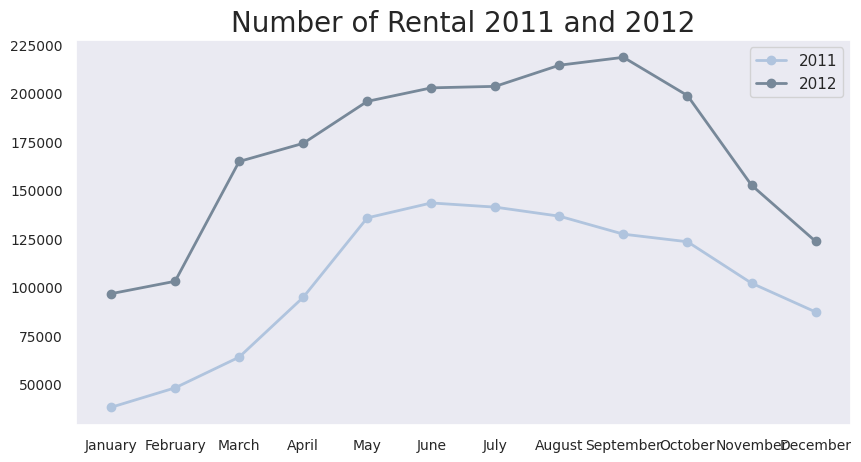

In [198]:
##How is the rental bike amount for each year and is there any difference in two years?
#line chart
day_2011.rename(columns={
    'registered': 'Registered',
    'cnt': 'Total',
    'casual': 'Casual',
}, inplace=True)

day_2012.rename(columns={
    'registered': 'Registered',
    'cnt': 'Total',
    'casual': 'Casual',
}, inplace=True)

print(day_2011)
#day_2011.index=day_2011.index.strftime('%B')
#day_2011=day_2011.reset_index()
#day_2012=day_2012.reset_index()
month=day_2011.dteday.unique()

df11 = day_2011.groupby('mnth').agg({
    'Registered': 'sum',
    'Total': 'sum',
    'Casual': 'sum'
}).round(0)

df12 = day_2012.groupby('mnth').agg({
    'Registered': 'sum',
    'Total': 'sum',
    'Casual': 'sum'
}).round(0)


plt.figure(figsize=(10, 5))
plt.plot(month, df11["Total"], marker='o', linewidth=2, label="2011", color="lightsteelblue")
plt.plot(month, df12["Total"], marker='o', linewidth=2, label="2012", color="lightslategray")
plt.title("Number of Rental 2011 and 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

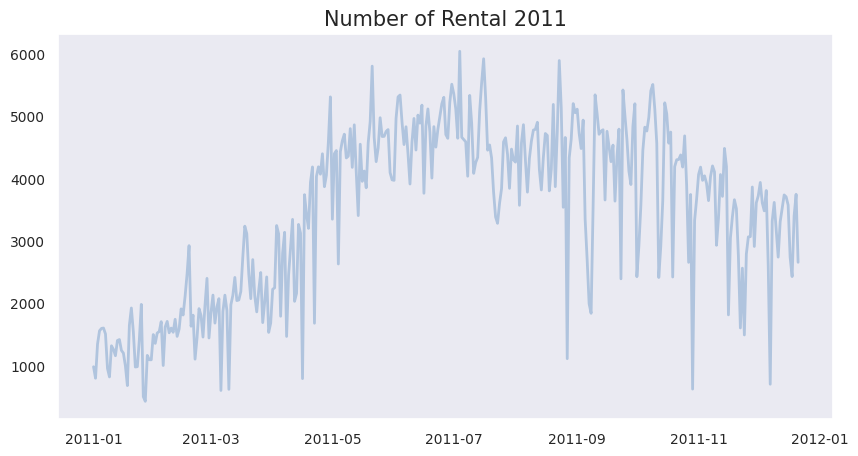

In [195]:
d2011=df_day.iloc[:355,:]
d2011=d2011.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(d2011['dteday'], d2011["cnt"], linewidth=2, label="2011", color="lightsteelblue")
plt.title("Number of Rental 2011", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

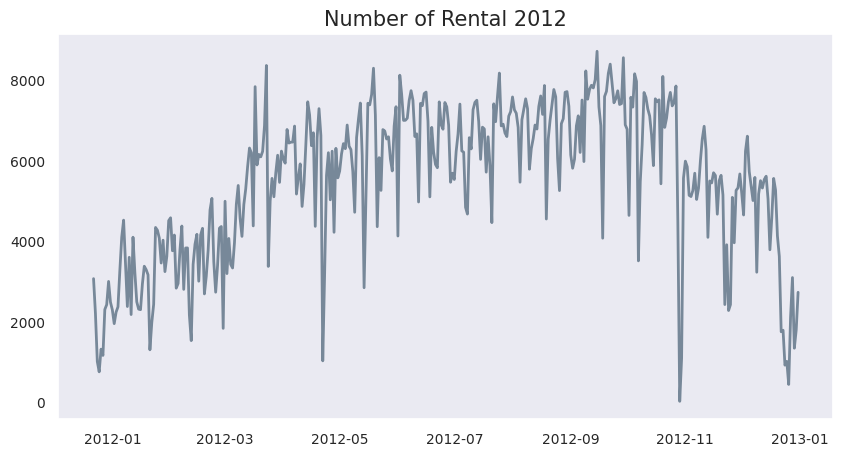

In [196]:
d2012=df_day.iloc[355:,:]
d2012=d2012.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(d2012['dteday'], d2012["cnt"], linewidth=2, label="2011", color="lightslategray")
plt.title("Number of Rental 2012", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:

           Weather  Registered   Total    Casual
0        Clear Day      645011  819567  168258.0
1      Mist/Cloudy      311037  378694   64006.0
2  Light Rain/Snow       23119   25112    1993.0
3  Heavy Rain/Snow           0       0       0.0


Text(0.5, 1.0, 'Bike Rental Count Based on Weather in 2011')

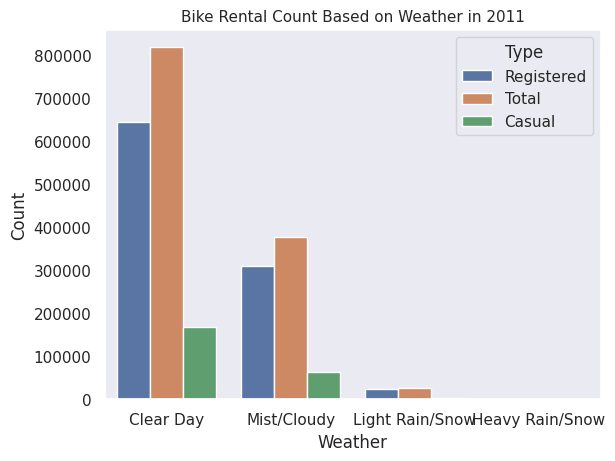

In [187]:
d11=df_day.iloc[:355,:]
d12=df_day.iloc[355:,:]

w11 = d11.groupby(by='weathersit').agg({
    'registered': 'sum',
    'cnt': 'sum',
    'casual': 'sum',
}).round(0)
w11=w11.reset_index()
w11.loc[len(w11.index)]=[4,0,0,0]

w11.rename(columns={
    'weathersit': 'Weather',
    'registered': 'Registered',
    'cnt': 'Total',
    'casual': 'Casual',
}, inplace=True)

w11['Weather'].replace([1,2,3,4],
    ['Clear Day','Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'],inplace=True)
print(w11)

sns.barplot(data=w11.melt(id_vars='Weather',
                            value_name='Count', var_name='Type'),
            x='Weather', y='Count', hue='Type')
plt.title("Bike Rental Count Based on Weather in 2011", loc="center", fontsize=11)



In [1]:
#which season has the highest count of bike rental in both years?
d12=df_day.iloc[355:,:]

w12 = d12.groupby(by='weathersit').agg({
    'registered': 'sum',
    'cnt': 'sum',
    'casual': 'sum',
}).round(0)
w12=w12.reset_index()
w12.loc[len(w12.index)]=[4,0,0,0]

w12.rename(columns={
    'weathersit': 'Weather',
    'registered': 'Registered',
    'cnt': 'Total',
    'casual': 'Casual',
}, inplace=True)

w12['Weather'].replace([1,2,3,4],
    ['Clear Day','Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'],inplace=True)
print(w12)

sns.barplot(data=w12.melt(id_vars='Weather',
                            value_name='Count', var_name='Type'),
            x='Weather', y='Count', hue='Type')
plt.title("Bike Rental Count Based on Weather in 2012", loc="center", fontsize=11)



NameError: name 'df_day' is not defined

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2